In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

🚀 Starting Femur Segmentation Training with Comprehensive Evaluation
✅ GPU Available: Tesla T4
   Memory: 14.7 GB
📂 Loading dataset...
🔍 Scanning for .dcm files...
   Raw path: /kaggle/input/unet-dataset/data/raw
   Mask path: /kaggle/input/unet-dataset/data/mask
📁 Found 8 potential case directories


Processing cases: 100%|██████████| 8/8 [00:00<00:00, 23.13it/s]


✅ Found 4289 matched pairs
📊 Dataset initialized with 3431 samples
📊 Dataset initialized with 858 samples
📊 Data split complete:
   Training samples: 3431
   Validation samples: 858
   Batch size: 8
🏗️  UNet Model initialized
   Parameters: 31,042,369
🖼️  Showing 3 sample images...


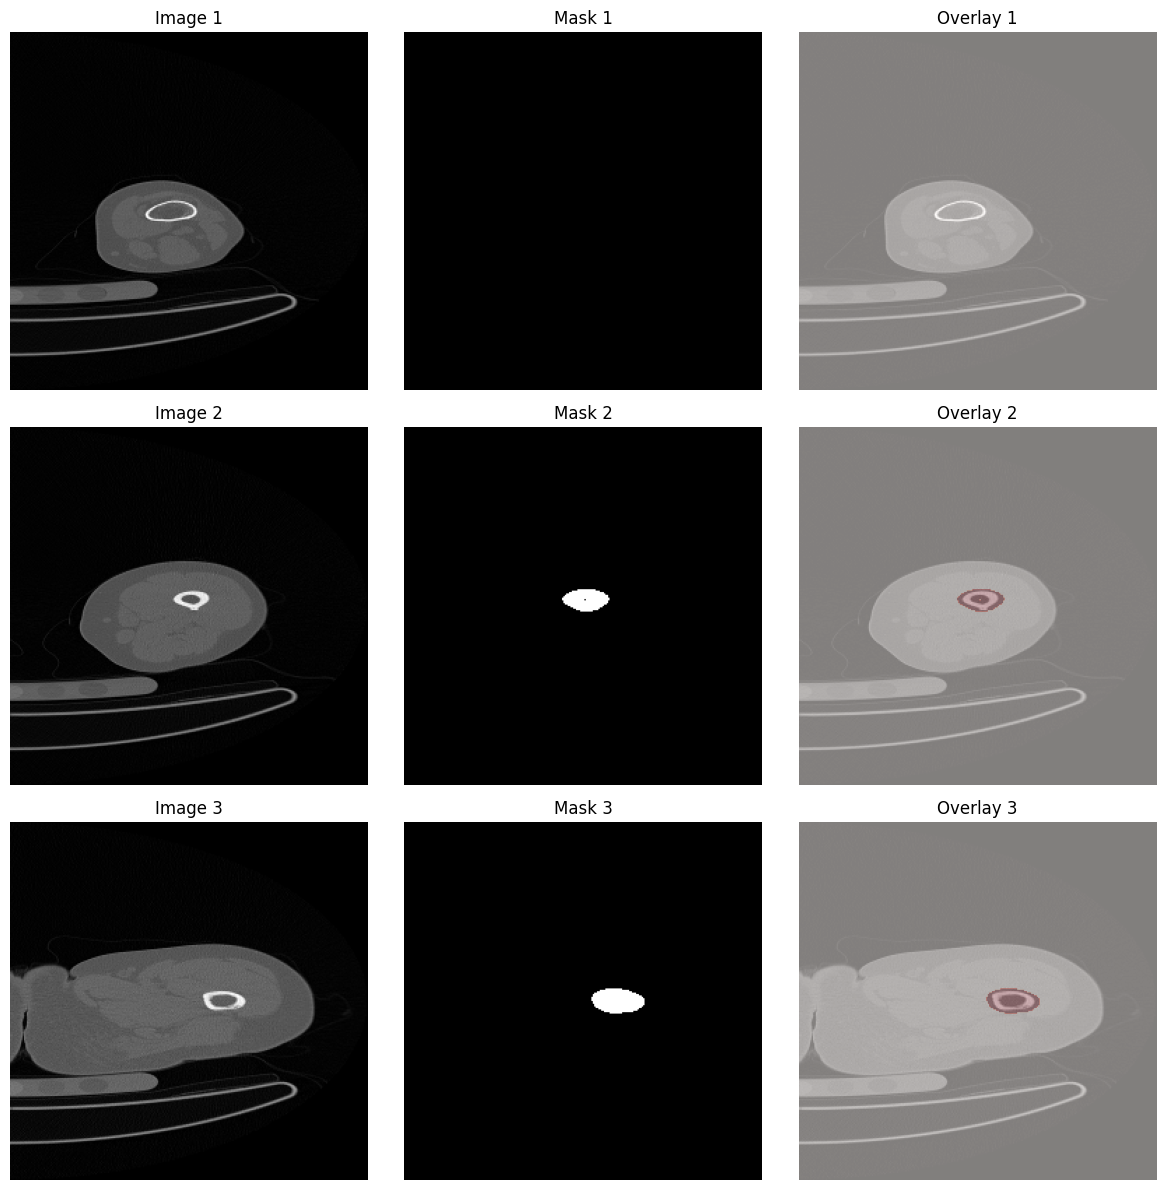

🚀 Starting training for 5 epochs with comprehensive evaluation


Epoch 1/5 [Val]: 100%|██████████| 108/108 [00:21<00:00,  5.00it/s, Loss=0.5645, Avg=2.2133]



📊 Epoch 1/5 Summary:
   Train Loss: 0.6317
   Val Loss: 0.5572
   Val Dice: 0.8705
   Time: 255.0s
   ✅ New best model saved! (Dice: 0.8705)
   💾 Best loss model saved! (Val Loss: 0.5572)
------------------------------------------------------------


Epoch 2/5 [Val]: 100%|██████████| 108/108 [00:21<00:00,  4.95it/s, Loss=0.4941, Avg=1.8951]



📊 Epoch 2/5 Summary:
   Train Loss: 0.5168
   Val Loss: 0.4771
   Val Dice: 0.7937
   Time: 257.2s
   💾 Best loss model saved! (Val Loss: 0.4771)
------------------------------------------------------------


Epoch 3/5 [Val]: 100%|██████████| 108/108 [00:21<00:00,  4.94it/s, Loss=0.3969, Avg=1.5104]



📊 Epoch 3/5 Summary:
   Train Loss: 0.4274
   Val Loss: 0.3802
   Val Dice: 0.8804
   Time: 257.1s
   ✅ New best model saved! (Dice: 0.8804)
   💾 Best loss model saved! (Val Loss: 0.3802)
------------------------------------------------------------


Epoch 4/5 [Val]: 100%|██████████| 108/108 [00:21<00:00,  4.98it/s, Loss=0.1997, Avg=0.8132]



📊 Epoch 4/5 Summary:
   Train Loss: 0.2721
   Val Loss: 0.2047
   Val Dice: 0.8055
   Time: 257.0s
   💾 Best loss model saved! (Val Loss: 0.2047)
------------------------------------------------------------


Epoch 5/5 [Val]: 100%|██████████| 108/108 [00:21<00:00,  4.95it/s, Loss=0.1406, Avg=0.4261]



📊 Epoch 5/5 Summary:
   Train Loss: 0.1378
   Val Loss: 0.1073
   Val Dice: 0.8989
   Time: 257.1s
   ✅ New best model saved! (Dice: 0.8989)
   💾 Best loss model saved! (Val Loss: 0.1073)
------------------------------------------------------------


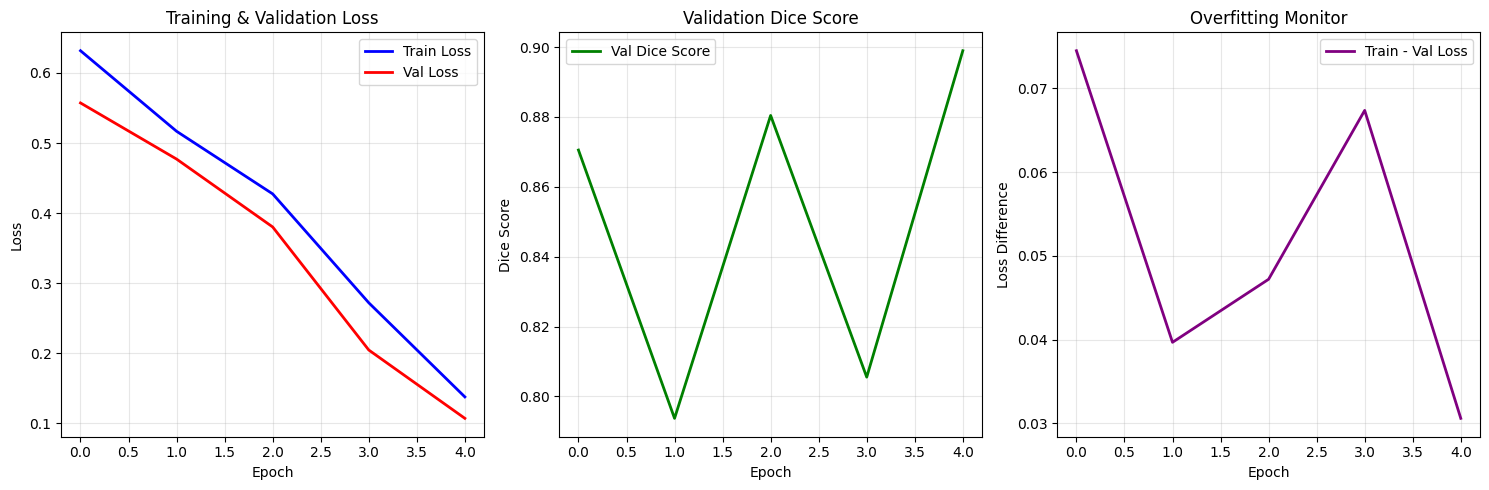


🔬 PERFORMING FINAL COMPREHENSIVE EVALUATION...
🔍 Performing comprehensive model evaluation...


Evaluating: 100%|██████████| 108/108 [00:21<00:00,  5.05it/s]



🎯 COMPREHENSIVE SEGMENTATION EVALUATION RESULTS

📊 PRIMARY METRICS:
--------------------------------------------------
Dice Similarity Coefficient (DSC): 0.8989 ± 0.2173
Intersection over Union (IoU):     0.8612 ± 0.2317
F1-Score:                          0.4362 ± 0.4498

📈 CLASSIFICATION METRICS:
--------------------------------------------------
Sensitivity (Recall):              0.4068 ± 0.4253
Specificity:                       0.9999 ± 0.0002
Precision:                         0.4827 ± 0.4913
Accuracy:                          0.9991 ± 0.0013

📏 SHAPE & BOUNDARY METRICS:
--------------------------------------------------
Hausdorff Distance:                0.00 ± 0.00 pixels
Volume Similarity:                 0.9053 ± 0.2175
Relative Volume Error:             816.0039 ± 23883.6704


🎭 PERFORMANCE INTERPRETATION:
--------------------------------------------------
Overall Segmentation Quality: Good (DSC = 0.8989)
⚠️  Low sensitivity - May miss positive regions
✅ High specificity - G

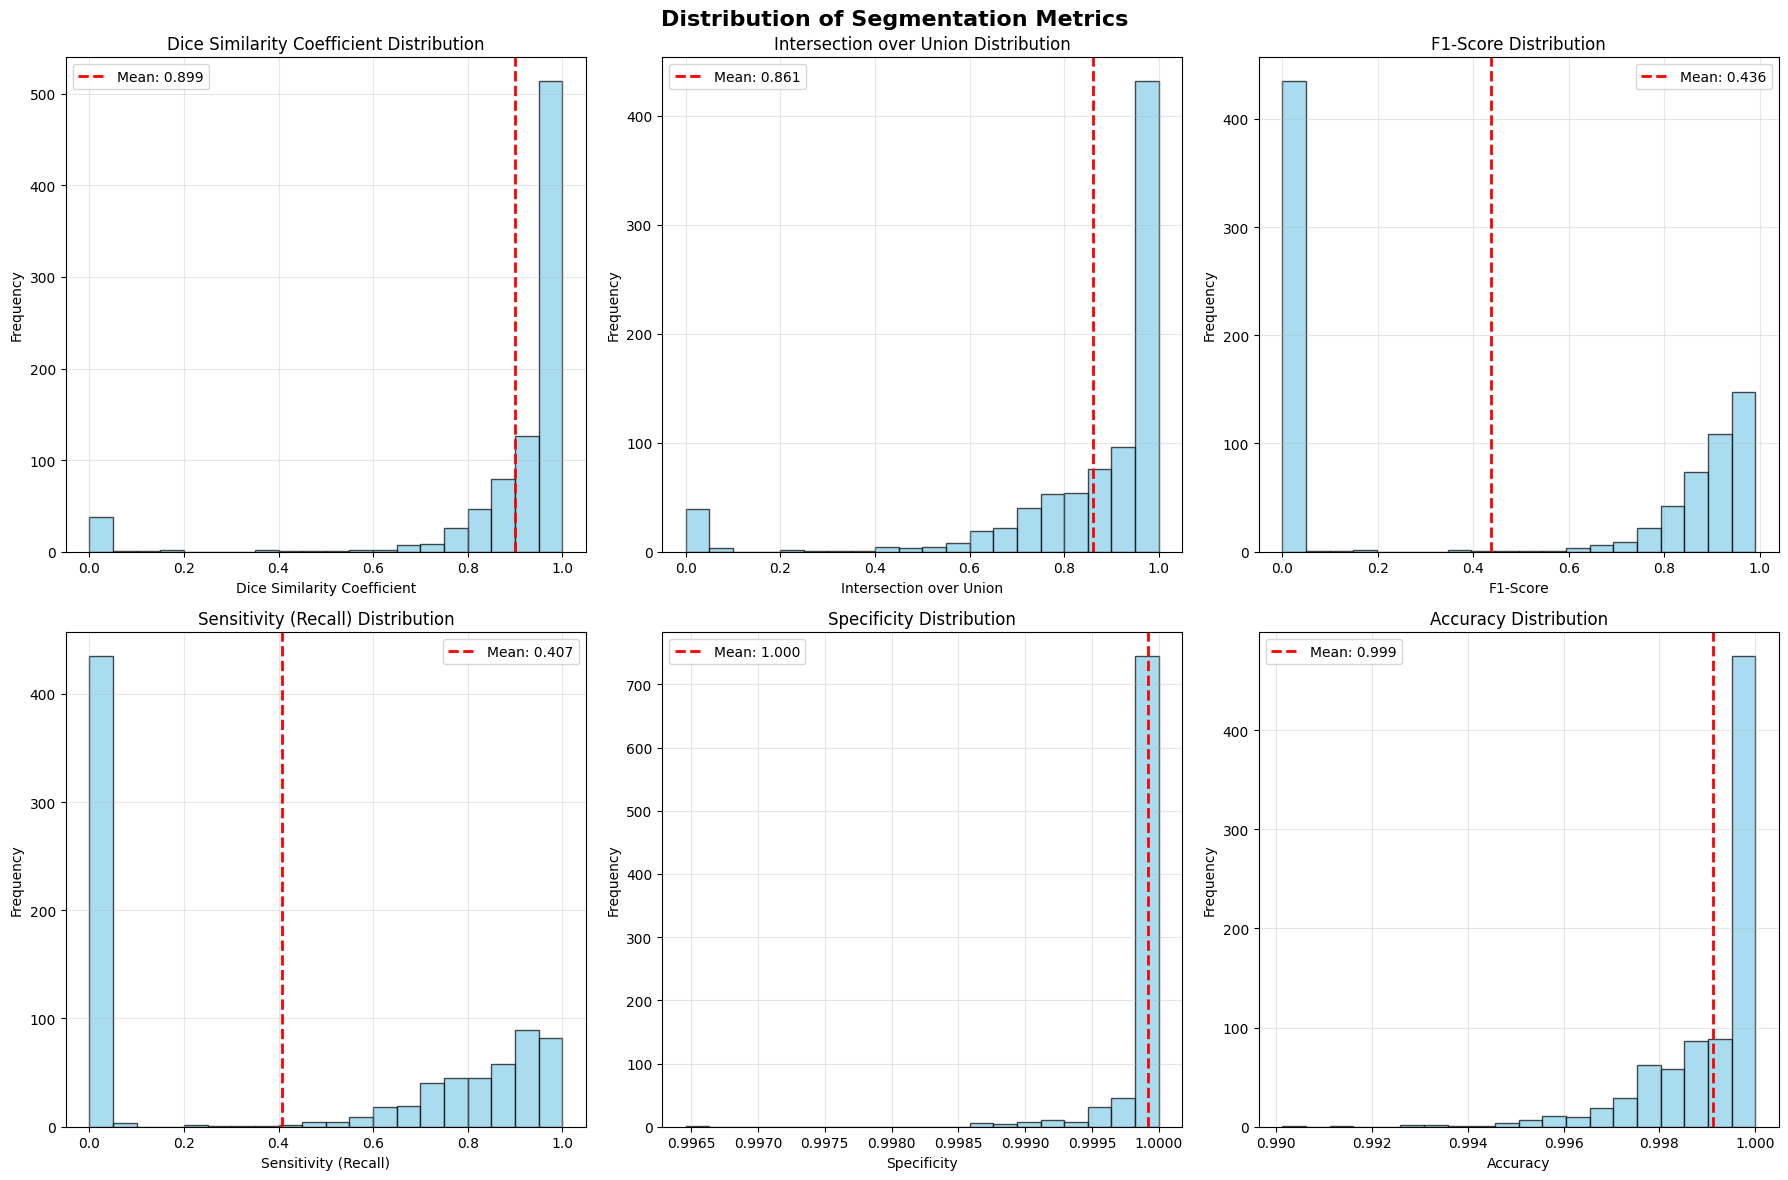

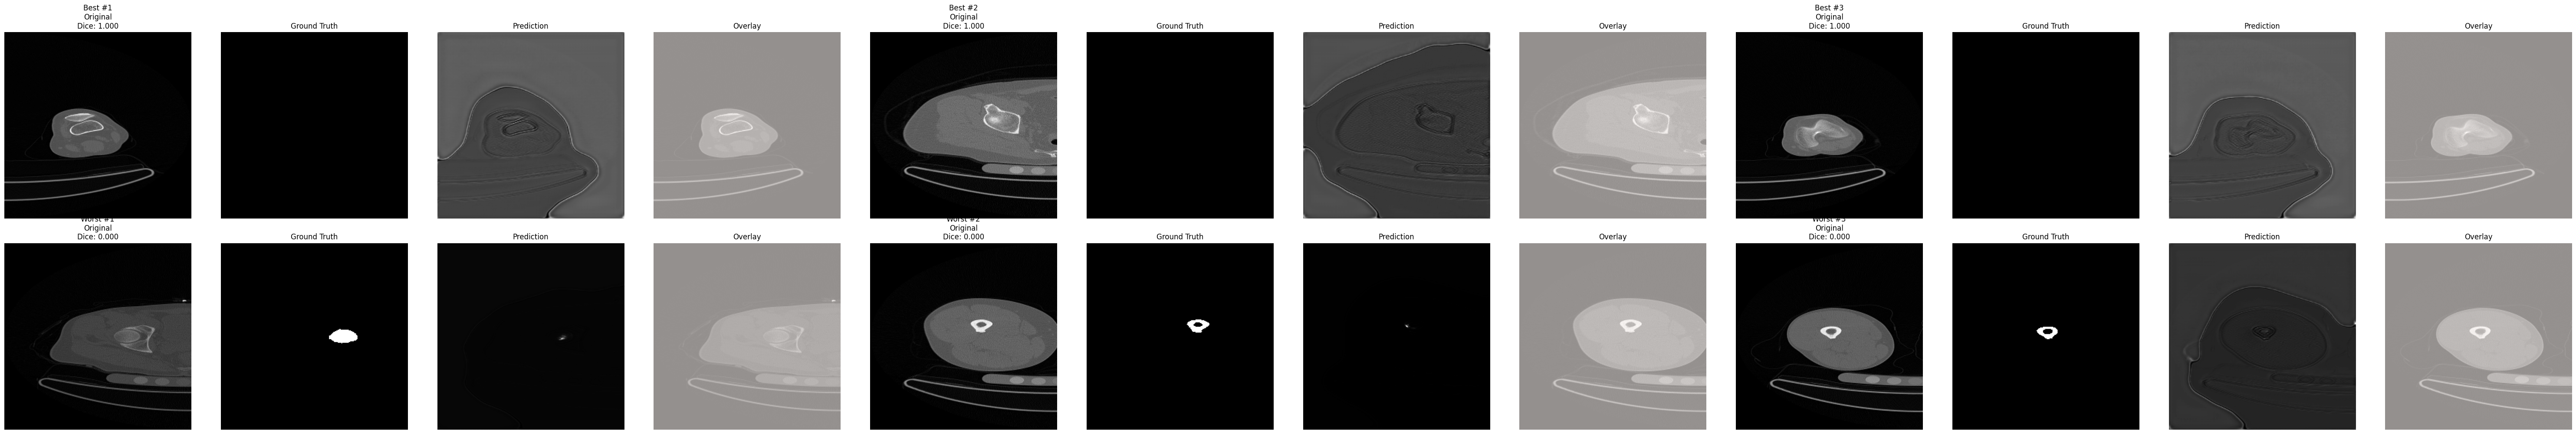


📋 DETAILED EVALUATION REPORT

📊 STATISTICAL SUMMARY:
--------------------------------------------------------------------------------
Metric                         Mean       Std        Min        Max        Status         
--------------------------------------------------------------------------------
Dice Similarity Coefficient    0.8989     0.2173     0.0000     1.0000     ✅ Good         
Intersection over Union        0.8612     0.2317     0.0000     1.0000     ✅ Good         
Sensitivity (Recall)           0.4068     0.4253     0.0000     1.0000     ❌ Poor         
Specificity                    0.9999     0.0002     0.9965     1.0000     ✅ Good         
Precision                      0.4827     0.4913     0.0000     1.0000     ❌ Poor         
F1-Score                       0.4362     0.4498     0.0000     0.9903     ❌ Poor         
Accuracy                       0.9991     0.0013     0.9901     1.0000     ✅ Good         

🎯 RECOMMENDATIONS:
------------------------------------

In [1]:
# Install required packages (run this in Kaggle notebook cell)
!pip install pydicom opencv-python tqdm

# Imports
import os
import numpy as np
import pydicom
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, jaccard_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
from scipy.spatial.distance import directed_hausdorff
from scipy import ndimage
warnings.filterwarnings('ignore')

# Kaggle-specific configurations
print("🚀 Starting Femur Segmentation Training with Comprehensive Evaluation")
print("=" * 60)

# Device setup with verbose output
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"✅ GPU Available: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    device = torch.device('cpu')
    print("⚠️  Using CPU (consider enabling GPU in Kaggle)")

# Paths - Updated for Kaggle environment
raw_path = '/kaggle/input/unet-dataset/data/raw'
mask_path = '/kaggle/input/unet-dataset/data/mask'

# Alternative paths for different dataset structures
if not os.path.exists(raw_path):
    possible_paths = [
        '/kaggle/input/*/raw',
        '/kaggle/input/*/images',
        '/kaggle/input/*/train/images',
        'data/raw',
        '../input/*/raw'
    ]
    
    print("🔍 Dataset not found at default path. Searching...")
    for path_pattern in possible_paths:
        import glob
        matches = glob.glob(path_pattern)
        if matches:
            raw_path = matches[0]
            print(f"✅ Found raw data at: {raw_path}")
            break
    else:
        print("❌ Could not find dataset. Please update the paths manually.")
        print("   Available input directories:")
        if os.path.exists('/kaggle/input'):
            for item in os.listdir('/kaggle/input'):
                print(f"   - /kaggle/input/{item}")

image_size = (256, 256)

# Comprehensive evaluation metrics class
class SegmentationMetrics:
    """
    Comprehensive evaluation metrics for medical image segmentation
    """
    
    def __init__(self):
        self.metrics_history = []
    
    def calculate_dice_coefficient(self, y_true, y_pred, smooth=1e-5):
        """
        Calculate Dice Similarity Coefficient (DSC)
        DSC = 2 * |A ∩ B| / (|A| + |B|)
        """
        y_true_flat = y_true.flatten()
        y_pred_flat = y_pred.flatten()
        
        intersection = np.sum(y_true_flat * y_pred_flat)
        dice = (2.0 * intersection + smooth) / (np.sum(y_true_flat) + np.sum(y_pred_flat) + smooth)
        return dice
    
    def calculate_iou(self, y_true, y_pred, smooth=1e-5):
        """
        Calculate Intersection over Union (IoU) / Jaccard Index
        IoU = |A ∩ B| / |A ∪ B|
        """
        y_true_flat = y_true.flatten()
        y_pred_flat = y_pred.flatten()
        
        intersection = np.sum(y_true_flat * y_pred_flat)
        union = np.sum(y_true_flat) + np.sum(y_pred_flat) - intersection
        iou = (intersection + smooth) / (union + smooth)
        return iou
    
    def calculate_sensitivity_specificity(self, y_true, y_pred):
        """
        Calculate Sensitivity (Recall/True Positive Rate) and Specificity (True Negative Rate)
        """
        y_true_flat = y_true.flatten().astype(bool)
        y_pred_flat = y_pred.flatten().astype(bool)
        
        tp = np.sum(y_true_flat & y_pred_flat)  # True Positive
        tn = np.sum(~y_true_flat & ~y_pred_flat)  # True Negative
        fp = np.sum(~y_true_flat & y_pred_flat)  # False Positive
        fn = np.sum(y_true_flat & ~y_pred_flat)  # False Negative
        
        sensitivity = tp / (tp + fn + 1e-5)  # Recall
        specificity = tn / (tn + fp + 1e-5)
        precision = tp / (tp + fp + 1e-5)
        accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-5)
        
        # F1 Score
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity + 1e-5)
        
        return {
            'sensitivity': sensitivity,
            'specificity': specificity,
            'precision': precision,
            'accuracy': accuracy,
            'f1_score': f1_score,
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn
        }
    
    def calculate_hausdorff_distance(self, y_true, y_pred):
        """
        Calculate Hausdorff Distance for boundary accuracy assessment
        """
        try:
            # Convert to binary and find contours
            y_true_binary = (y_true > 0.5).astype(np.uint8)
            y_pred_binary = (y_pred > 0.5).astype(np.uint8)
            
            # Find contours
            contours_true, _ = cv2.findContours(y_true_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            contours_pred, _ = cv2.findContours(y_pred_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            if len(contours_true) == 0 or len(contours_pred) == 0:
                return float('inf')
            
            # Get boundary points
            true_points = np.vstack(contours_true).squeeze()
            pred_points = np.vstack(contours_pred).squeeze()
            
            # Calculate Hausdorff distance
            hausdorff_dist = max(
                directed_hausdorff(true_points, pred_points)[0],
                directed_hausdorff(pred_points, true_points)[0]
            )
            
            return hausdorff_dist
        except:
            return float('inf')
    
    def calculate_volume_similarity(self, y_true, y_pred):
        """
        Calculate Volume Similarity metrics
        """
        vol_true = np.sum(y_true > 0.5)
        vol_pred = np.sum(y_pred > 0.5)
        
        # Volume Similarity
        vol_similarity = 1 - abs(vol_true - vol_pred) / (vol_true + vol_pred + 1e-5)
        
        # Relative Volume Error
        relative_vol_error = abs(vol_true - vol_pred) / (vol_true + 1e-5)
        
        return {
            'volume_similarity': vol_similarity,
            'relative_volume_error': relative_vol_error,
            'true_volume': vol_true,
            'pred_volume': vol_pred
        }
    
    def evaluate_batch(self, y_true_batch, y_pred_batch, threshold=0.5):
        """
        Evaluate a batch of predictions and return comprehensive metrics
        """
        batch_metrics = {
            'dice': [],
            'iou': [],
            'sensitivity': [],
            'specificity': [],
            'precision': [],
            'accuracy': [],
            'f1_score': [],
            'hausdorff': [],
            'volume_similarity': [],
            'relative_volume_error': []
        }
        
        for i in range(len(y_true_batch)):
            y_true = y_true_batch[i]
            y_pred = (y_pred_batch[i] > threshold).astype(np.float32)
            
            # Calculate metrics
            dice = self.calculate_dice_coefficient(y_true, y_pred)
            iou = self.calculate_iou(y_true, y_pred)
            sens_spec = self.calculate_sensitivity_specificity(y_true, y_pred)
            hausdorff = self.calculate_hausdorff_distance(y_true, y_pred)
            vol_metrics = self.calculate_volume_similarity(y_true, y_pred)
            
            # Store metrics
            batch_metrics['dice'].append(dice)
            batch_metrics['iou'].append(iou)
            batch_metrics['sensitivity'].append(sens_spec['sensitivity'])
            batch_metrics['specificity'].append(sens_spec['specificity'])
            batch_metrics['precision'].append(sens_spec['precision'])
            batch_metrics['accuracy'].append(sens_spec['accuracy'])
            batch_metrics['f1_score'].append(sens_spec['f1_score'])
            batch_metrics['hausdorff'].append(hausdorff)
            batch_metrics['volume_similarity'].append(vol_metrics['volume_similarity'])
            batch_metrics['relative_volume_error'].append(vol_metrics['relative_volume_error'])
        
        # Calculate mean and std for each metric
        summary_metrics = {}
        for key, values in batch_metrics.items():
            valid_values = [v for v in values if not np.isinf(v) and not np.isnan(v)]
            if valid_values:
                summary_metrics[f'{key}_mean'] = np.mean(valid_values)
                summary_metrics[f'{key}_std'] = np.std(valid_values)
            else:
                summary_metrics[f'{key}_mean'] = 0.0
                summary_metrics[f'{key}_std'] = 0.0
        
        return summary_metrics, batch_metrics

# Dataset class (same as before)
class FemurDataset(Dataset):
    def __init__(self, image_files, mask_files):
        self.image_files = image_files
        self.mask_files = mask_files
        print(f"📊 Dataset initialized with {len(image_files)} samples")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        try:
            # Load DICOM image
            img_path = self.image_files[idx]
            ds_img = pydicom.dcmread(img_path)
            img = ds_img.pixel_array.astype(np.float32)
            img = cv2.resize(img, image_size)
            
            # Improved normalization
            img_min, img_max = img.min(), img.max()
            if img_max > img_min:
                img = (img - img_min) / (img_max - img_min)
            else:
                img = np.zeros_like(img)
            img = np.expand_dims(img, axis=0)

            # Load DICOM mask
            mask_path = self.mask_files[idx]
            ds_mask = pydicom.dcmread(mask_path)
            mask = ds_mask.pixel_array.astype(np.float32)
            mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
            mask = (mask > 0).astype(np.float32)  # binarize
            mask = np.expand_dims(mask, axis=0)

            return torch.tensor(img), torch.tensor(mask)
        
        except Exception as e:
            print(f"❌ Error loading sample {idx}: {e}")
            return torch.zeros(1, *image_size), torch.zeros(1, *image_size)

# File collection function (same as before)
def collect_file_pairs(raw_root, mask_root, ext=".dcm"):
    print(f"🔍 Scanning for {ext} files...")
    print(f"   Raw path: {raw_root}")
    print(f"   Mask path: {mask_root}")
    
    if not os.path.exists(raw_root):
        print(f"❌ Raw path doesn't exist: {raw_root}")
        return [], []
    
    if not os.path.exists(mask_root):
        print(f"❌ Mask path doesn't exist: {mask_root}")
        return [], []
    
    image_paths, mask_paths = [], []
    cases = sorted(os.listdir(raw_root))
    
    print(f"📁 Found {len(cases)} potential case directories")
    
    for case in tqdm(cases, desc="Processing cases"):
        raw_dir = os.path.join(raw_root, case)
        mask_dir = os.path.join(mask_root, case.replace("-input", "-seg"))
        
        if not os.path.isdir(raw_dir) or not os.path.isdir(mask_dir): 
            continue

        raw_files = sorted([f for f in os.listdir(raw_dir) if f.endswith(ext)])
        mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith(ext)])

        raw_map = {os.path.splitext(f)[0]: os.path.join(raw_dir, f) for f in raw_files}
        mask_map = {os.path.splitext(f)[0]: os.path.join(mask_dir, f) for f in mask_files}

        common = sorted(set(raw_map) & set(mask_map))
        image_paths.extend([raw_map[k] for k in common])
        mask_paths.extend([mask_map[k] for k in common])

    print(f"✅ Found {len(image_paths)} matched pairs")
    return image_paths, mask_paths

# Enhanced UNet (same as before)
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        def CBR(in_c, out_c): 
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True),
            )
        
        # Encoder
        self.enc1 = CBR(1, 64)
        self.enc2 = CBR(64, 128)
        self.enc3 = CBR(128, 256)
        self.enc4 = CBR(256, 512)
        self.pool = nn.MaxPool2d(2)
        
        # Bottleneck
        self.middle = CBR(512, 1024)
        
        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, 2, 2)
        self.dec4 = CBR(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, 2)
        self.dec3 = CBR(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, 2)
        self.dec2 = CBR(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, 2)
        self.dec1 = CBR(128, 64)
        
        # Final layer
        self.final = nn.Conv2d(64, 1, 1)
        
        print(f"🏗️  UNet Model initialized")
        print(f"   Parameters: {sum(p.numel() for p in self.parameters()):,}")

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))
        
        # Bottleneck
        m = self.middle(self.pool(e4))
        
        # Decoder with skip connections
        d4 = self.dec4(torch.cat([self.up4(m), e4], 1))
        d3 = self.dec3(torch.cat([self.up3(d4), e3], 1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], 1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], 1))
        
        return torch.sigmoid(self.final(d1))

# Enhanced loss function (same as before)
class DiceBCELoss(nn.Module):
    def __init__(self, dice_weight=0.5, bce_weight=0.5):
        super().__init__()
        self.dice_weight = dice_weight
        self.bce_weight = bce_weight
        self.bce = nn.BCELoss()

    def forward(self, y_pred, y_true, smooth=1e-5):
        # Flatten tensors
        y_pred_flat = y_pred.view(-1)
        y_true_flat = y_true.view(-1)
        
        # Dice loss
        intersection = (y_pred_flat * y_true_flat).sum()
        dice = (2. * intersection + smooth) / (y_pred_flat.sum() + y_true_flat.sum() + smooth)
        dice_loss = 1 - dice
        
        # BCE loss
        bce_loss = self.bce(y_pred_flat, y_true_flat)
        
        # Combined loss
        total_loss = self.dice_weight * dice_loss + self.bce_weight * bce_loss
        return total_loss

# Comprehensive evaluation function
def evaluate_model(model, val_loader, metrics_calculator, device):
    """
    Comprehensive model evaluation with detailed metrics
    """
    print("🔍 Performing comprehensive model evaluation...")
    model.eval()
    
    all_predictions = []
    all_ground_truths = []
    
    with torch.no_grad():
        for imgs, masks in tqdm(val_loader, desc="Evaluating"):
            imgs = imgs.to(device)
            outputs = model(imgs)
            
            # Convert to numpy for metrics calculation
            pred_np = outputs.cpu().numpy()
            true_np = masks.numpy()
            
            all_predictions.extend(pred_np)
            all_ground_truths.extend(true_np)
    
    # Calculate comprehensive metrics
    summary_metrics, detailed_metrics = metrics_calculator.evaluate_batch(
        all_ground_truths, all_predictions
    )
    
    return summary_metrics, detailed_metrics, all_predictions, all_ground_truths

def print_evaluation_results(summary_metrics):
    """
    Print comprehensive evaluation results in a formatted table
    """
    print("\n" + "="*80)
    print("🎯 COMPREHENSIVE SEGMENTATION EVALUATION RESULTS")
    print("="*80)
    
    # Primary metrics
    print("\n📊 PRIMARY METRICS:")
    print("-" * 50)
    print(f"Dice Similarity Coefficient (DSC): {summary_metrics['dice_mean']:.4f} ± {summary_metrics['dice_std']:.4f}")
    print(f"Intersection over Union (IoU):     {summary_metrics['iou_mean']:.4f} ± {summary_metrics['iou_std']:.4f}")
    print(f"F1-Score:                          {summary_metrics['f1_score_mean']:.4f} ± {summary_metrics['f1_score_std']:.4f}")
    
    # Classification metrics
    print("\n📈 CLASSIFICATION METRICS:")
    print("-" * 50)
    print(f"Sensitivity (Recall):              {summary_metrics['sensitivity_mean']:.4f} ± {summary_metrics['sensitivity_std']:.4f}")
    print(f"Specificity:                       {summary_metrics['specificity_mean']:.4f} ± {summary_metrics['specificity_std']:.4f}")
    print(f"Precision:                         {summary_metrics['precision_mean']:.4f} ± {summary_metrics['precision_std']:.4f}")
    print(f"Accuracy:                          {summary_metrics['accuracy_mean']:.4f} ± {summary_metrics['accuracy_std']:.4f}")
    
    # Shape and boundary metrics
    print("\n📏 SHAPE & BOUNDARY METRICS:")
    print("-" * 50)
    print(f"Hausdorff Distance:                {summary_metrics['hausdorff_mean']:.2f} ± {summary_metrics['hausdorff_std']:.2f} pixels")
    print(f"Volume Similarity:                 {summary_metrics['volume_similarity_mean']:.4f} ± {summary_metrics['volume_similarity_std']:.4f}")
    print(f"Relative Volume Error:             {summary_metrics['relative_volume_error_mean']:.4f} ± {summary_metrics['relative_volume_error_std']:.4f}")
    
    print("\n" + "="*80)
    
    # Performance interpretation
    print("\n🎭 PERFORMANCE INTERPRETATION:")
    print("-" * 50)
    
    dice = summary_metrics['dice_mean']
    if dice > 0.9:
        performance = "Excellent"
    elif dice > 0.8:
        performance = "Good"
    elif dice > 0.7:
        performance = "Fair"
    else:
        performance = "Poor"
    
    print(f"Overall Segmentation Quality: {performance} (DSC = {dice:.4f})")
    
    if summary_metrics['sensitivity_mean'] > 0.9:
        print("✅ High sensitivity - Good at detecting positive regions")
    elif summary_metrics['sensitivity_mean'] < 0.7:
        print("⚠️  Low sensitivity - May miss positive regions")
    
    if summary_metrics['specificity_mean'] > 0.9:
        print("✅ High specificity - Good at avoiding false positives")
    elif summary_metrics['specificity_mean'] < 0.7:
        print("⚠️  Low specificity - May have too many false positives")
    
    print("="*80)

def plot_metrics_distribution(detailed_metrics):
    """
    Plot distribution of metrics across all samples
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Distribution of Segmentation Metrics', fontsize=16, fontweight='bold')
    
    metrics_to_plot = [
        ('dice', 'Dice Similarity Coefficient'),
        ('iou', 'Intersection over Union'),
        ('f1_score', 'F1-Score'),
        ('sensitivity', 'Sensitivity (Recall)'),
        ('specificity', 'Specificity'),
        ('accuracy', 'Accuracy')
    ]
    
    for idx, (metric, title) in enumerate(metrics_to_plot):
        row, col = idx // 3, idx % 3
        ax = axes[row, col]
        
        data = detailed_metrics[metric]
        valid_data = [x for x in data if not np.isnan(x) and not np.isinf(x)]
        
        ax.hist(valid_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax.axvline(np.mean(valid_data), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(valid_data):.3f}')
        ax.set_xlabel(title)
        ax.set_ylabel('Frequency')
        ax.set_title(f'{title} Distribution')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def visualize_best_worst_predictions(model, val_loader, detailed_metrics, n_samples=3):
    """
    Visualize best and worst predictions based on Dice score
    """
    model.eval()
    
    # Get all predictions and ground truths
    all_imgs = []
    all_masks = []
    all_preds = []
    
    with torch.no_grad():
        for imgs, masks in val_loader:
            imgs_device = imgs.to(device)
            outputs = model(imgs_device)
            
            all_imgs.extend(imgs.numpy())
            all_masks.extend(masks.numpy())
            all_preds.extend(outputs.cpu().numpy())
    
    # Get indices of best and worst predictions
    dice_scores = detailed_metrics['dice']
    sorted_indices = np.argsort(dice_scores)
    
    best_indices = sorted_indices[-n_samples:][::-1]  # Top n
    worst_indices = sorted_indices[:n_samples]        # Bottom n
    
    fig, axes = plt.subplots(2, n_samples * 4, figsize=(5 * n_samples * 4, 10))
    
    # Plot best predictions
    for i, idx in enumerate(best_indices):
        img = all_imgs[idx].squeeze()
        mask = all_masks[idx].squeeze()
        pred = all_preds[idx].squeeze()
        dice = dice_scores[idx]
        
        # Original image
        axes[0, i*4].imshow(img, cmap='gray')
        axes[0, i*4].set_title(f'Best #{i+1}\nOriginal\nDice: {dice:.3f}')
        axes[0, i*4].axis('off')
        
        # Ground truth
        axes[0, i*4+1].imshow(mask, cmap='gray')
        axes[0, i*4+1].set_title('Ground Truth')
        axes[0, i*4+1].axis('off')
        
        # Prediction
        axes[0, i*4+2].imshow(pred, cmap='gray')
        axes[0, i*4+2].set_title('Prediction')
        axes[0, i*4+2].axis('off')
        
        # Overlay
        axes[0, i*4+3].imshow(img, cmap='gray', alpha=0.7)
        axes[0, i*4+3].imshow(pred > 0.5, cmap='Reds', alpha=0.4)
        axes[0, i*4+3].set_title('Overlay')
        axes[0, i*4+3].axis('off')
    
    # Plot worst predictions
    for i, idx in enumerate(worst_indices):
        img = all_imgs[idx].squeeze()
        mask = all_masks[idx].squeeze()
        pred = all_preds[idx].squeeze()
        dice = dice_scores[idx]
        
        # Original image
        axes[1, i*4].imshow(img, cmap='gray')
        axes[1, i*4].set_title(f'Worst #{i+1}\nOriginal\nDice: {dice:.3f}')
        axes[1, i*4].axis('off')
        
        # Ground truth
        axes[1, i*4+1].imshow(mask, cmap='gray')
        axes[1, i*4+1].set_title('Ground Truth')
        axes[1, i*4+1].axis('off')
        
        # Prediction
        axes[1, i*4+2].imshow(pred, cmap='gray')
        axes[1, i*4+2].set_title('Prediction')
        axes[1, i*4+2].axis('off')
        
        # Overlay
        axes[1, i*4+3].imshow(img, cmap='gray', alpha=0.7)
        axes[1, i*4+3].imshow(pred > 0.5, cmap='Reds', alpha=0.4)
        axes[1, i*4+3].set_title('Overlay')
        axes[1, i*4+3].axis('off')
    
    plt.tight_layout()
    plt.show()

# Enhanced training function with evaluation
def train_model_with_evaluation(model, train_loader, val_loader, criterion, optimizer, metrics_calculator, num_epochs=10):
    print(f"🚀 Starting training for {num_epochs} epochs with comprehensive evaluation")
    print("=" * 60)
    
    train_losses, val_losses = [], []
    dice_scores = []
    best_val_loss = float('inf')
    best_dice = 0.0
    
    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        
        # Training phase
        model.train()
        total_loss = 0
        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
        
        for batch_idx, (imgs, masks) in enumerate(train_pbar):
            imgs, masks = imgs.to(device), masks.to(device)
            
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item() * imgs.size(0)
            
            train_pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Avg': f'{total_loss / ((batch_idx + 1) * imgs.size(0)):.4f}'
            })
        
        avg_train_loss = total_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)

        # Validation phase with metrics
        model.eval()
        val_loss = 0
        val_predictions = []
        val_ground_truths = []
        
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]")
        
        with torch.no_grad():
            for batch_idx, (imgs, masks) in enumerate(val_pbar):
                imgs, masks = imgs.to(device), masks.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, masks)
                val_loss += loss.item() * imgs.size(0)
                
                # Collect for metrics calculation
                val_predictions.extend(outputs.cpu().numpy())
                val_ground_truths.extend(masks.cpu().numpy())
                
                val_pbar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Avg': f'{val_loss / ((batch_idx + 1) * imgs.size(0)):.4f}'
                })
        
        avg_val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(avg_val_loss)
        
        # Calculate validation metrics
        summary_metrics, _ = metrics_calculator.evaluate_batch(val_ground_truths, val_predictions)
        current_dice = summary_metrics['dice_mean']
        dice_scores.append(current_dice)
        
        # Calculate epoch time
        epoch_time = time.time() - epoch_start_time
        
        # Print epoch summary
        print(f"\n📊 Epoch {epoch+1}/{num_epochs} Summary:")
        print(f"   Train Loss: {avg_train_loss:.4f}")
        print(f"   Val Loss: {avg_val_loss:.4f}")
        print(f"   Val Dice: {current_dice:.4f}")
        print(f"   Time: {epoch_time:.1f}s")
        
        # Save best model based on Dice score
        if current_dice > best_dice:
            best_dice = current_dice
            torch.save(model.state_dict(), 'best_model_dice.pth')
            print(f"   ✅ New best model saved! (Dice: {best_dice:.4f})")
        
        # Save best model based on validation loss
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model_loss.pth')
            print(f"   💾 Best loss model saved! (Val Loss: {best_val_loss:.4f})")
        
        print("-" * 60)

    # Plot training curves with metrics
    plt.figure(figsize=(15, 5))
    
    # Loss curves
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label="Train Loss", color='blue', linewidth=2)
    plt.plot(val_losses, label="Val Loss", color='red', linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Dice score progression
    plt.subplot(1, 3, 2)
    plt.plot(dice_scores, label="Val Dice Score", color='green', linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Dice Score")
    plt.title("Validation Dice Score")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Overfitting monitor
    plt.subplot(1, 3, 3)
    plt.plot(np.array(train_losses) - np.array(val_losses), label="Train - Val Loss", color='purple', linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss Difference")
    plt.title("Overfitting Monitor")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return train_losses, val_losses, dice_scores

# Sample visualization functions (keeping the same as before)
def show_sample_batch(loader, n=3):
    print(f"🖼️  Showing {n} sample images...")
    imgs, masks = next(iter(loader))
    
    plt.figure(figsize=(12, 4 * n))
    for i in range(min(n, len(imgs))):
        img = imgs[i].squeeze().numpy()
        mask = masks[i].squeeze().numpy()
        
        plt.subplot(n, 3, i * 3 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')
        
        plt.subplot(n, 3, i * 3 + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask {i+1}")
        plt.axis('off')
        
        plt.subplot(n, 3, i * 3 + 3)
        plt.imshow(img, cmap='gray', alpha=0.7)
        plt.imshow(mask, cmap='Reds', alpha=0.3)
        plt.title(f"Overlay {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def create_evaluation_report(summary_metrics, detailed_metrics):
    """
    Create a comprehensive evaluation report
    """
    print("\n" + "="*100)
    print("📋 DETAILED EVALUATION REPORT")
    print("="*100)
    
    # Statistical summary
    print("\n📊 STATISTICAL SUMMARY:")
    print("-" * 80)
    
    metrics_info = [
        ("Dice Similarity Coefficient", "dice", "Higher is better (0-1)", 0.8),
        ("Intersection over Union", "iou", "Higher is better (0-1)", 0.7),
        ("Sensitivity (Recall)", "sensitivity", "Higher is better (0-1)", 0.8),
        ("Specificity", "specificity", "Higher is better (0-1)", 0.9),
        ("Precision", "precision", "Higher is better (0-1)", 0.8),
        ("F1-Score", "f1_score", "Higher is better (0-1)", 0.8),
        ("Accuracy", "accuracy", "Higher is better (0-1)", 0.85)
    ]
    
    print(f"{'Metric':<30} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10} {'Status':<15}")
    print("-" * 80)
    
    for name, key, desc, threshold in metrics_info:
        values = detailed_metrics[key]
        valid_values = [v for v in values if not np.isnan(v) and not np.isinf(v)]
        
        if valid_values:
            mean_val = np.mean(valid_values)
            std_val = np.std(valid_values)
            min_val = np.min(valid_values)
            max_val = np.max(valid_values)
            status = "✅ Good" if mean_val >= threshold else "⚠️ Fair" if mean_val >= threshold * 0.8 else "❌ Poor"
        else:
            mean_val = std_val = min_val = max_val = 0
            status = "❌ No Data"
        
        print(f"{name:<30} {mean_val:<10.4f} {std_val:<10.4f} {min_val:<10.4f} {max_val:<10.4f} {status:<15}")
    
    # Recommendations
    print(f"\n🎯 RECOMMENDATIONS:")
    print("-" * 80)
    
    dice_mean = summary_metrics['dice_mean']
    sens_mean = summary_metrics['sensitivity_mean']
    spec_mean = summary_metrics['specificity_mean']
    
    if dice_mean < 0.7:
        print("• Consider adjusting model architecture or training parameters")
        print("• Increase training data or apply data augmentation")
        print("• Review loss function - consider focal loss for class imbalance")
    
    if sens_mean < 0.8:
        print("• Model may be missing positive regions - consider:")
        print("  - Adjusting class weights in loss function")
        print("  - Using focal loss to handle hard examples")
        print("  - Increasing positive sample representation")
    
    if spec_mean < 0.9:
        print("• Model may have too many false positives - consider:")
        print("  - Post-processing techniques (morphological operations)")
        print("  - Adjusting prediction threshold")
        print("  - Adding regularization")
    
    hausdorff_mean = summary_metrics['hausdorff_mean']
    if hausdorff_mean > 10:  # pixels
        print("• Boundary accuracy could be improved:")
        print("  - Consider boundary loss functions")
        print("  - Add shape constraints")
        print("  - Use active contour methods for post-processing")
    
    print("="*100)

def save_evaluation_results(summary_metrics, detailed_metrics, filename='evaluation_results.txt'):
    """
    Save evaluation results to a text file
    """
    with open(filename, 'w') as f:
        f.write("FEMUR SEGMENTATION EVALUATION RESULTS\n")
        f.write("="*50 + "\n\n")
        
        f.write("SUMMARY METRICS:\n")
        f.write("-"*30 + "\n")
        for key, value in summary_metrics.items():
            f.write(f"{key}: {value:.6f}\n")
        
        f.write(f"\nDETAILED METRICS (per sample):\n")
        f.write("-"*30 + "\n")
        for key, values in detailed_metrics.items():
            valid_values = [v for v in values if not np.isnan(v) and not np.isinf(v)]
            if valid_values:
                f.write(f"{key}: {len(valid_values)} samples\n")
                f.write(f"  Mean: {np.mean(valid_values):.6f}\n")
                f.write(f"  Std:  {np.std(valid_values):.6f}\n")
                f.write(f"  Min:  {np.min(valid_values):.6f}\n")
                f.write(f"  Max:  {np.max(valid_values):.6f}\n")
    
    print(f"💾 Evaluation results saved to {filename}")

# Main execution
if __name__ == "__main__":
    try:
        # Initialize metrics calculator
        metrics_calculator = SegmentationMetrics()
        
        # Load and prepare data
        print("📂 Loading dataset...")
        raw_files, mask_files = collect_file_pairs(raw_path, mask_path)
        
        if len(raw_files) == 0:
            print("❌ No data found! Please check your dataset paths.")
            print("   Update the raw_path and mask_path variables at the top of the script.")
        else:
            # Split data
            train_images, val_images, train_masks, val_masks = train_test_split(
                raw_files, mask_files, test_size=0.2, random_state=42
            )
            
            # Create datasets and dataloaders
            train_dataset = FemurDataset(train_images, train_masks)
            val_dataset = FemurDataset(val_images, val_masks)
            
            # Adjust batch size based on available memory
            batch_size = 8 if torch.cuda.is_available() else 4
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
            
            print(f"📊 Data split complete:")
            print(f"   Training samples: {len(train_dataset)}")
            print(f"   Validation samples: {len(val_dataset)}")
            print(f"   Batch size: {batch_size}")
            
            # Initialize model, loss, and optimizer
            model = UNet().to(device)
            criterion = DiceBCELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
            
            # Show sample data
            if len(train_dataset) > 0:
                show_sample_batch(train_loader)
                
                # Train the model with comprehensive evaluation
                train_losses, val_losses, dice_scores = train_model_with_evaluation(
                    model, train_loader, val_loader, criterion, optimizer, 
                    metrics_calculator, num_epochs=5
                )
                
                # Load best model for final evaluation
                model.load_state_dict(torch.load('best_model_dice.pth'))
                
                print("\n🔬 PERFORMING FINAL COMPREHENSIVE EVALUATION...")
                print("="*60)
                
                # Comprehensive evaluation
                summary_metrics, detailed_metrics, all_predictions, all_ground_truths = evaluate_model(
                    model, val_loader, metrics_calculator, device
                )
                
                # Display results
                print_evaluation_results(summary_metrics)
                
                # Plot metrics distributions
                plot_metrics_distribution(detailed_metrics)
                
                # Show best and worst predictions
                visualize_best_worst_predictions(model, val_loader, detailed_metrics, n_samples=3)
                
                # Create detailed report
                create_evaluation_report(summary_metrics, detailed_metrics)
                
                # Save results
                save_evaluation_results(summary_metrics, detailed_metrics)
                
                print(f"\n🎉 TRAINING AND EVALUATION COMPLETED SUCCESSFULLY!")
                print(f"   Final Dice Score: {summary_metrics['dice_mean']:.4f} ± {summary_metrics['dice_std']:.4f}")
                print(f"   Best models saved as 'best_model_dice.pth' and 'best_model_loss.pth'")
                print(f"   Detailed results saved in 'evaluation_results.txt'")
                
            else:
                print("❌ No training data available!")
                
    except Exception as e:
        print(f"❌ An error occurred: {e}")
        import traceback
        traceback.print_exc()